<a href="https://colab.research.google.com/github/JonSpivak666/Quantum-Computation-in-Python/blob/main/Quantum_Computation_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Representacion de Estados Cuanticos

In [4]:
import numpy as np

def create_qubit(state):
    """
    Crea un qubit representado como un vector en el espacio de Hilbert.
    """
    if len(state) != 2 or not np.isclose(np.linalg.norm(state), 1):
        raise ValueError("El estado debe tener exactamente dos elementos y estar normalizado.")
    return np.array(state, dtype=complex)

def apply_gate(qubit, gate):
    """
    Aplica una puerta cuántica a un qubit dado.
    """
    if gate.shape != (2, 2):
        raise ValueError("La puerta cuántica debe ser una matriz 2x2.")
    return np.dot(gate, qubit)

zero_state = create_qubit([1, 0])  # Estado |0>
one_state = create_qubit([0, 1])   # Estado |1>

pauli_x = np.array([[0, 1], [1, 0]])  # Puerta X
hadamard = np.array([[1, 1], [1, -1]]) / np.sqrt(2)  # Puerta Hadamard

qubit_hadamard = apply_gate(zero_state, hadamard)
qubit_x = apply_gate(zero_state, pauli_x)

print("Estado inicial |0>:", zero_state)
print("Estado después de Hadamard:", qubit_hadamard)
print("Estado después de X:", qubit_x)


Estado inicial |0>: [1.+0.j 0.+0.j]
Estado después de Hadamard: [0.70710678+0.j 0.70710678+0.j]
Estado después de X: [0.+0.j 1.+0.j]


## Simulacion de puertas de dos Qubits

In [5]:
def tensor_product(state1, state2):
    """
    Calcula el producto tensorial de dos estados cuánticos.
    """
    return np.kron(state1, state2)

def apply_two_qubit_gate(state, gate):
    """
    Aplica una puerta cuántica de dos qubits a un estado compuesto.
    """
    if gate.shape != (4, 4):
        raise ValueError("La puerta cuántica debe ser una matriz 4x4.")
    return np.dot(gate, state)


qubit1 = create_qubit([1, 0])  # |0>
qubit2 = create_qubit([0, 1])  # |1>

combined_state = tensor_product(qubit1, qubit2)

cnot_gate = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 0, 1],
                      [0, 0, 1, 0]])

result_state = apply_two_qubit_gate(combined_state, cnot_gate)

print("Estado combinado inicial:", combined_state)
print("Estado después de CNOT:", result_state)


Estado combinado inicial: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
Estado después de CNOT: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]


## Implementacion del algoritmo de Deutsch-Jozsa

In [8]:
def deutsch_jozsa_algorithm(oracle, n):
    """
    Implementa el algoritmo de Deutsch-Jozsa para una función oracle dada.
    """

    state = np.zeros(2**n, dtype=complex)
    state[0] = 1

    hadamard_n = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    hadamard_n_full = hadamard_n
    for _ in range(n - 1):
        hadamard_n_full = np.kron(hadamard_n_full, hadamard_n)
    state = np.dot(hadamard_n_full, state)

    state = np.dot(oracle, state)


    state = np.dot(hadamard_n_full, state)


    probabilities = np.abs(state)**2
    result = np.argmax(probabilities)
    return "Equilibrada" if result != 0 else "Constante"

oracle_constant = np.eye(4, dtype=complex)


oracle_balanced = np.array([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]], dtype=complex)

print("Oracle constante:", deutsch_jozsa_algorithm(oracle_constant, 2))
print("Oracle equilibrada:", deutsch_jozsa_algorithm(oracle_balanced, 2))

Oracle constante: Constante
Oracle equilibrada: Constante


## Algoritmo de Grover

In [ ]:
def grover_algorithm(n, oracle, iterations):
    """
    Implementa el algoritmo de Grover para búsqueda no estructurada.
    """

    state = np.ones(2**n, dtype=complex) / np.sqrt(2**n)


    diffusion_operator = 2 * np.outer(state, state) - np.eye(2**n)


    for _ in range(iterations):
        state = np.dot(oracle, state)
        state = np.dot(diffusion_operator, state)


    probabilities = np.abs(state)**2
    result = np.argmax(probabilities)
    return result, probabilities[result]


oracle_grover = np.eye(8, dtype=complex)
oracle_grover[5, 5] = -1


resultado, probabilidad = grover_algorithm(3, oracle_grover, 2)
print("Estado marcado encontrado:", bin(resultado))
print("Probabilidad de éxito:", probabilidad)

## Teletransporte cuantico

In [11]:
def quantum_teleportation(initial_state):
    """
    Simula el protocolo de teletransporte cuántico.
    """
    if len(initial_state) != 2:
        raise ValueError("El estado inicial debe tener dimensión 2 (un único qubit).")


    bell_pair = np.array([1, 0, 0, 1]) / np.sqrt(2)
    combined_state = np.kron(initial_state, bell_pair)


    cnot = np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 0, 1],
                     [0, 0, 1, 0]])
    cnot_full = np.kron(cnot, np.eye(2))
    combined_state = np.dot(cnot_full, combined_state)

    hadamard = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
    hadamard_full = np.kron(hadamard, np.eye(4))
    combined_state = np.dot(hadamard_full, combined_state)


    measurement = np.eye(8)
    post_measurement_state = np.dot(measurement, combined_state)
    post_measurement_state = post_measurement_state / np.linalg.norm(post_measurement_state)

    return post_measurement_state


state_to_teleport = np.array([1, 0])
teleported_state = quantum_teleportation(state_to_teleport)
print("Estado teletransportado:", teleported_state)


Estado teletransportado: [0.5 0.  0.  0.5 0.5 0.  0.  0.5]


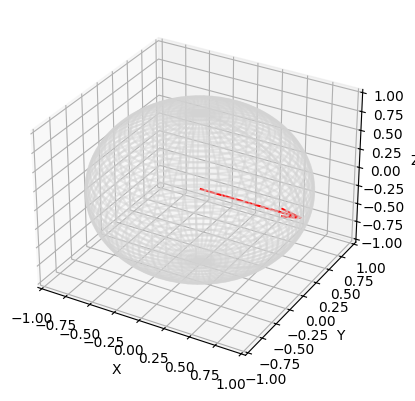

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_bloch_sphere(state):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    u, v = np.mgrid[0:2 * np.pi:100j, 0:np.pi:50j]
    x = np.sin(v) * np.cos(u)
    y = np.sin(v) * np.sin(u)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="lightgrey", alpha=0.5)
    theta = 2 * np.arccos(np.abs(state[0]))
    phi = np.angle(state[1])
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    ax.quiver(0, 0, 0, x, y, z, color="r", arrow_length_ratio=0.2)
    plt.show()

qubit_hadamard = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)])
plot_bloch_sphere(qubit_hadamard)